In [109]:
import os
import pandas as pd
from matplotlib import pyplot as plt

df= pd.read_csv('indian_liver_patient.csv')

In [43]:
print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [45]:
#check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [96]:
#fill Na
# Calculate the mean of the 'Albumin_and_Globulin_Ratio' column
mean_value = df['Albumin_and_Globulin_Ratio'].mean()

# Replace missing values with the mean
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(mean_value)

# Check the result
print(df['Albumin_and_Globulin_Ratio'].head())

1    0.9
4    1.0
5    0.4
6    1.3
7    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64


In [98]:
#remove duplicates
df = df.drop_duplicates()

In [100]:
#set 'Gender' as categorical
df['Gender'] = df['Gender'].astype('category')

In [102]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0,1
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1
6,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
7,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.0,1


In [104]:
#view data
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
6,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
7,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
566,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
567,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
568,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
569,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


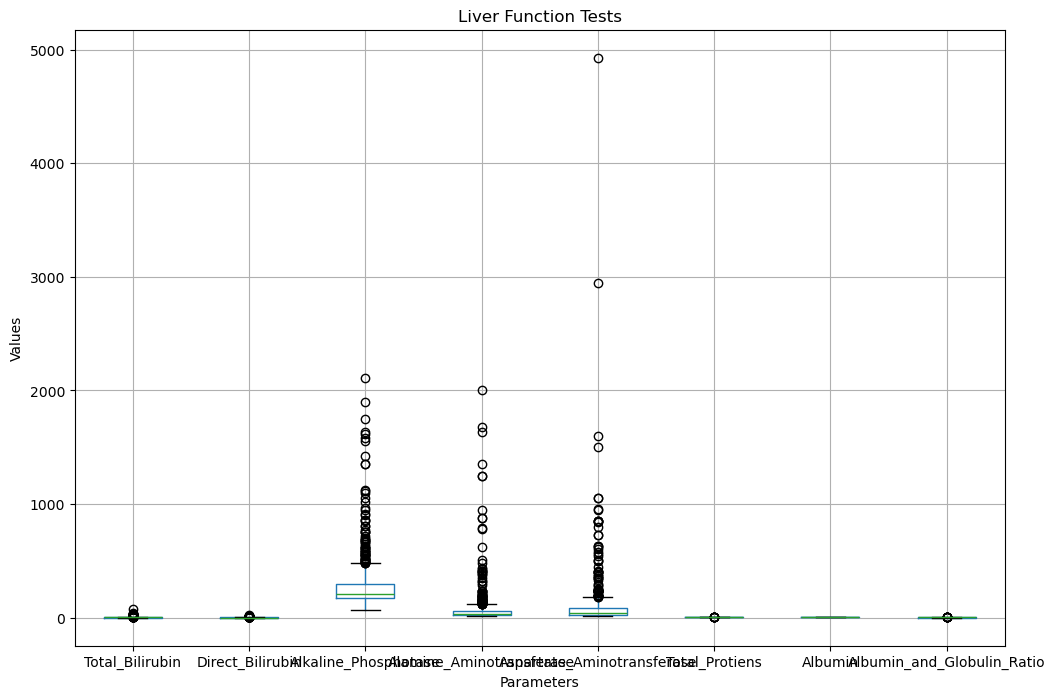

In [111]:
#boxplot to find outliers
columns_to_analyze = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                      'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                      'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

df[columns_to_analyze].boxplot(figsize=(12,8))
plt.title('Liver Function Tests')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.show()

In [135]:
# removing outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows outside the bounds
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


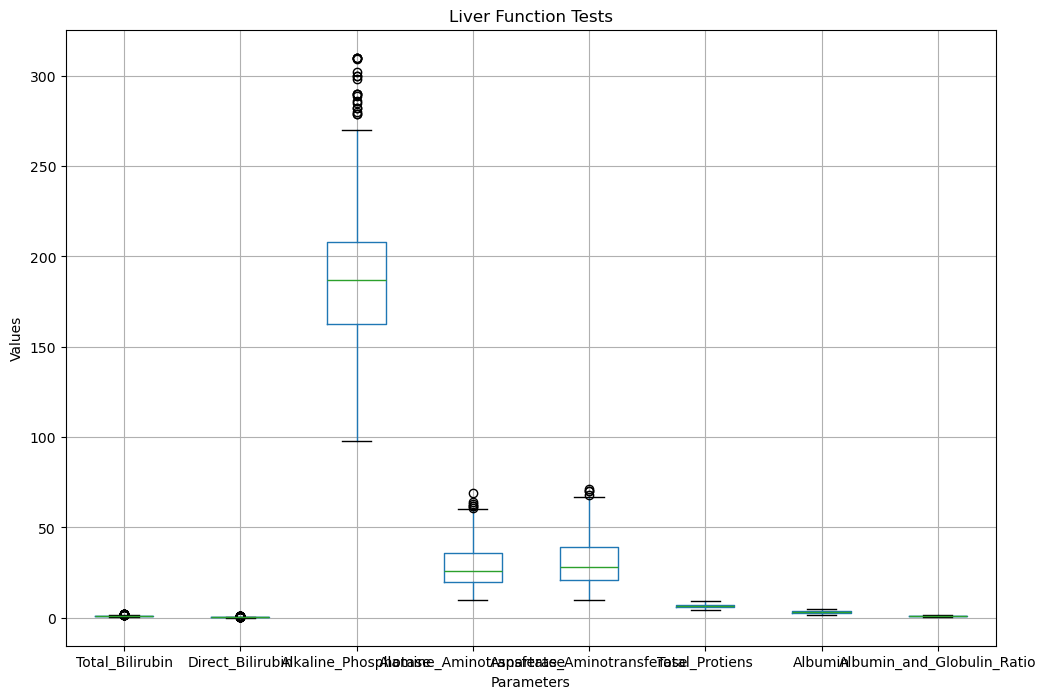

In [137]:
#boxplot to find outliers
columns_to_analyze = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                      'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                      'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

df[columns_to_analyze].boxplot(figsize=(12,8))
plt.title('Liver Function Tests')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.show()